In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv
from numpy import matmul as mm
import scipy
from scipy.linalg import lu_factor,lu_solve

x = np.linspace(-4,2,20)
y = (x+1)**3+10*np.random.normal(0,1,20)
def polynomialFitLU(x,y,order=3):
    for i in range(order+1):
        if i == 0:
            Phi = x**i
        else:
            Phi = np.vstack((Phi,x**i))
    Phi = Phi.T
    if order == 0:
        Phi = Phi.reshape(-1,1)
    lu,piv = lu_factor(mm(Phi.T,Phi))
    tmp = lu_solve((lu,piv),Phi.T)
    w = mm(tmp,y)
    f = mm(Phi,w)
    dif = y-f
    err = mm(dif.T,dif)
    return f,err,w,Phi

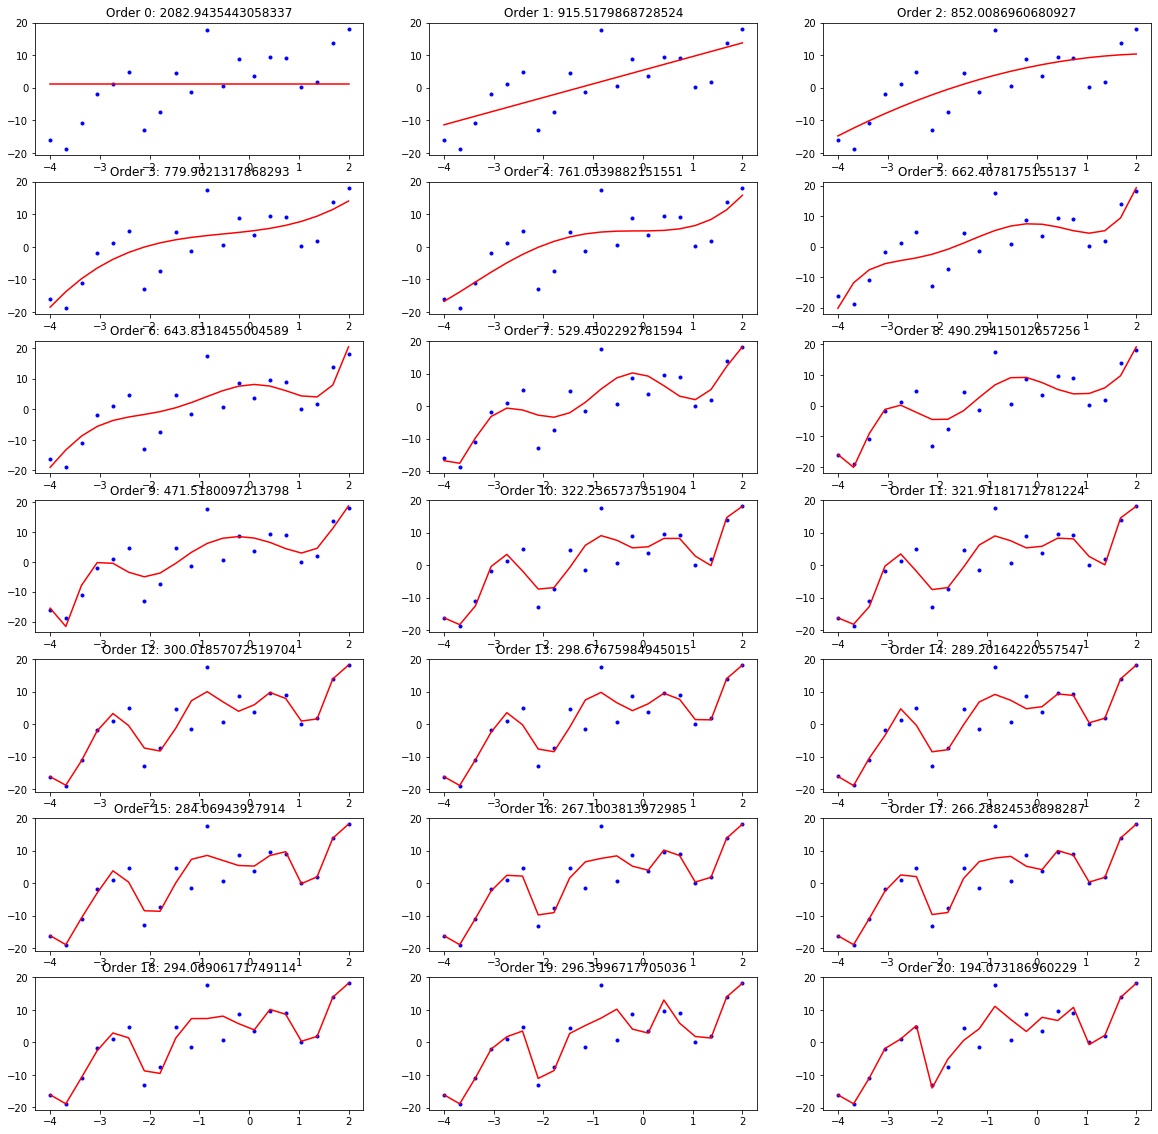

In [2]:
errlistLU = []
plt.figure(figsize=(20,20))
for i in range(21):
    plt.subplot(7,3,i+1)
    f,err,w,Phi = polynomialFitLU(x,y,i)
    errlistLU.append(err)
    plt.plot(x,y,'b.')
    plt.plot(x,f,'r-')
    plt.title('Order '+str(i)+': '+str(err))

The sum of squared errors is a convex function of $\mathbf{w}$: 

$$E(\mathbf{w})=(\mathbf{y}-\mathbf{\Phi w})^\top(\mathbf{y}-\mathbf{\Phi w})$$

The weight vector is 

$$\mathbf{\hat{w}}=(\mathbf{\Phi^\top\Phi})^{-1}\mathbf{\Phi^\top y}$$

### Observation noise
The observations are noisy:
$$y_n = f_\mathbf{w}(x_n)+\epsilon_n$$

The noise can be characterized with a probability density function, for example, a Gaussian density function, $\epsilon_n\sim\mathcal{N}(0,\sigma^2_{noise})$,
$$p(\epsilon_n)=\frac{1}{\sqrt{2\pi\sigma^2_{noise}}}\exp\bigg(-\frac{\epsilon^2_n}{2\sigma^2_{noise}}\bigg)$$

The independent noise terms can be stacked as $\mathbf{\epsilon}=[\epsilon_1,...,\epsilon_N]^\top$, 

\begin{align}
\mathbf{\epsilon}&\sim\mathcal{N}(\mathbf{\epsilon};0,\sigma^2_{noise}\mathbf{I})\\
p(\mathbf{\epsilon})&=\prod^N_{i=1}p(\epsilon_n)=\bigg(\frac{1}{\sqrt{2\pi\sigma^2_{noise}}}\bigg)^N\exp(-\frac{\epsilon^\top\epsilon}{2\sigma^2_{noise}})
\end{align}

Given that $\mathbf{y}=\mathbf{f}+\mathbf{\epsilon}$, 

\begin{align}
p(\epsilon) &= p(\mathbf{y}|\mathbf{f},\sigma^2_{noise}) = \mathcal{N}(\mathbf{y};\mathbf{f},\sigma^2_{noise}) \\
&= \bigg(\frac{1}{\sqrt{2\pi\sigma^2_{noise}}}\bigg)^N\exp\bigg(-\frac{\|\mathbf{y}-\mathbf{f}\|^2}{2\sigma^2_{noise}}\bigg) \\
&= \bigg(\frac{1}{\sqrt{2\pi\sigma^2_{noise}}}\bigg)^N\exp\bigg(-\frac{E(\mathbf{w})}{2\sigma^2_{noise}}\bigg)
\end{align}

### Likelihood
The likelihood of the parameters is the probability of the data given parameters.

- $p(\mathbf{y}|\mathbf{w},\sigma^2_{noise})$ is the probability of the observed data given the weights.
- $\mathcal{L}(\mathbf{y}|\mathbf{w},\sigma^2_{noise})$ is the likelihood of the weights.

### Maximum likelihood
Fit the model weights to the data by maximizing the likelihood:

$$\mathbf{\hat{w}}=\arg\max\mathcal{L}(\mathbf{w})=\arg\max\exp\bigg(-\frac{E(\mathbf{w})}{2\sigma^2_{noise}}\bigg)=\arg\min E(\mathbf{w})$$

With an additive Gaussian independent noise model, the **maximum likelihood** and the **least squares** solutions are the same.

In [10]:
print(errlistLU)
print(w)

[2082.9435443058337, 915.5179868728524, 852.0086960680927, 779.9021317868293, 761.0539882151551, 662.4078175155137, 643.8318455004589, 529.4502292781594, 490.29415012657256, 471.5180097213798, 322.2365737351904, 321.91181712781224, 300.01857072519704, 298.67675984945015, 289.20164220557547, 284.06943927914, 267.1003813972985, 266.28824536898287, 294.06906171749114, 296.3996717705036, 194.073186960229]
[ 6.39773752e+00  1.60476718e+01 -1.99027687e+01 -1.24549999e+02
  1.12954352e+02  3.30341907e+02 -1.20378571e+02 -3.84728228e+02
 -8.16607630e+00  2.01465464e+02  5.35819868e+01 -4.21247674e+01
 -2.01745910e+01  1.16151911e+00  1.91175012e+00  2.98135810e-01
  5.14467134e-02  2.69740281e-02  4.53298263e-03 -8.50544471e-05
 -4.92070226e-05]


Assume $\sigma_{noise}=10$,

In [7]:
np.exp(-np.array(errlistLU)/100/2)

array([2.99878661e-05, 1.02796411e-02, 1.41216884e-02, 2.02518191e-02,
       2.22531893e-02, 3.64417899e-02, 3.99886655e-02, 7.08456901e-02,
       8.61667634e-02, 9.46480458e-02, 1.99651313e-01, 1.99975767e-01,
       2.23109443e-01, 2.24611329e-01, 2.35508515e-01, 2.41630109e-01,
       2.63026128e-01, 2.64096364e-01, 2.29846104e-01, 2.27183241e-01,
       3.78944344e-01])

Text(0.5, 1.0, 'Likelihood')

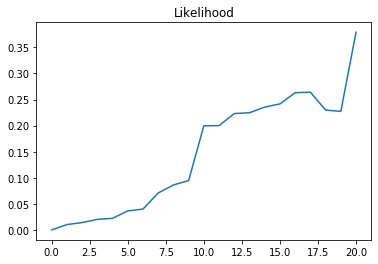

In [9]:
plt.plot(np.arange(21),np.exp(-np.array(errlistLU)/100/2))
plt.title('Likelihood')